In [224]:
#https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/ 
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

In [225]:
# Read the dataset 
tem = pd.read_csv('../../Datos/LQI/20m/raw_data_run1--28.csv', 
                       index_col ='Date', 
                       parse_dates = True) 
  

cantidad=len(tem)
print(cantidad)

8064


In [226]:
# Print the first ten rows of the dataset 
tem.head(10) 

,LQI
Date,
1,1
2,104
3,108
4,1
5,1
6,97
7,101
8,103
9,1


<AxesSubplot:xlabel='Date'>

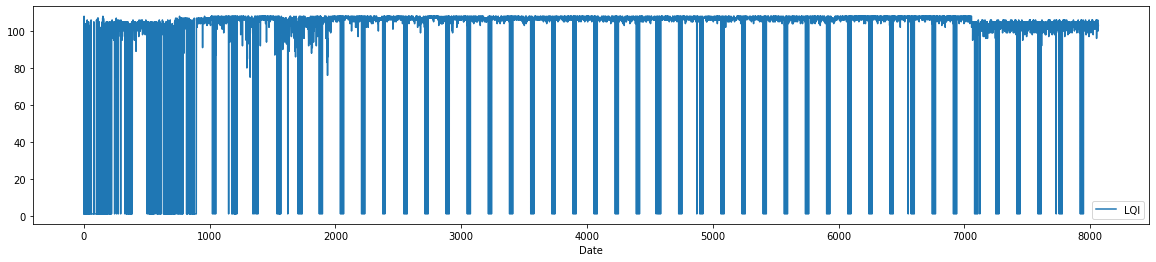

In [227]:
tem.plot(figsize=(20,4))

In [228]:
# Import the library 
#from pmdarima import auto_arima 
  
# Ignore harmless warnings 
#import warnings 
#warnings.filterwarnings("ignore") 
  
# Fit auto_arima function 
#stepwise_fit = auto_arima(tem['LQI'], start_p = 2, start_q = 2, 
#                          max_p = 3, max_q = 3, m = 12, 
 #                         start_P = 0, seasonal = True, 
  #                        d = None, D = 1, trace = True, 
   #                       error_action ='ignore',   # we don't want to know if an order does not work 
    #                      suppress_warnings = True,  # we don't want convergence warnings 
     #                     stepwise = True)           # set to stepwise 
  
# To print the summary 
#stepwise_fit.summary() 

In [229]:
#Walk Forward Validation implementation
# Split data into train / test sets 

#wfv 55-65-75
PrimerEntrenamiento = int((cantidad/100)*55)
SegundoEntrenamiento = int((cantidad/100)*65)
Test = int((cantidad/100)*75)

In [230]:
#PRIMER ENTRENAMIENTO
train1 = tem.iloc[:PrimerEntrenamiento] 
  
# Fit a SARIMAX(0, 0, 2)x(1, 1, 2, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train1['LQI'],  
                order = (0, 0, 2),  
                seasonal_order =(1, 1, 2, 12)) 
  
result = model.fit() 
result.summary() 

C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                LQI   No. Observations:                 4435
Model:             SARIMAX(0, 0, 2)x(1, 1, 2, 12)   Log Likelihood              -20540.853
Date:                            Tue, 27 Jul 2021   AIC                          41093.705
Time:                                    17:10:04   BIC                          41132.072
Sample:                                         0   HQIC                         41107.236
                                           - 4435                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1788      0.010     18.723      0.000       0.160       0.198
ma.L2          0.1599      0.009     16.863      0.000       0.141       0.178
ar.S.L12      -0.9998      0.001   -935.887      0.000      -1.002      -0.998
ma.S.L12       0.0842      0.012      6.911      0.000       0.060       0.108
ma.S.L24      -0.9083      0.011    -82.734      0.000      -0.930      -0.887
sigma2       627.4005      8.975     69.907      0.000     609.810     644.991
===================================================================================
Ljung-Box (Q):                     2163.79   Jarque-Bera (JB):              7549.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

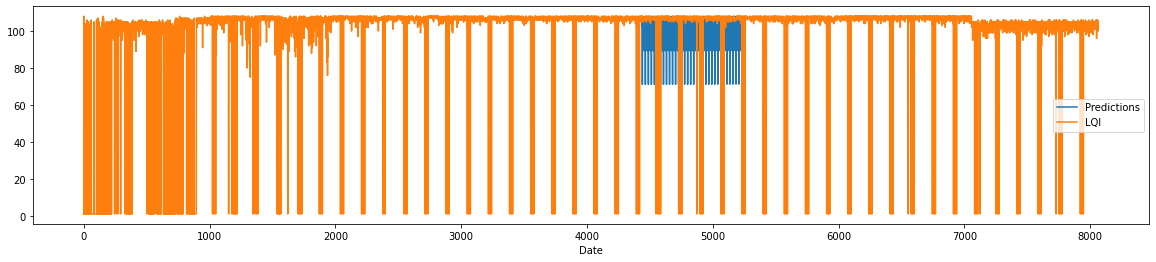

In [231]:
#Primera predicción
start = PrimerEntrenamiento 
end = SegundoEntrenamiento - 1
  

predictions1 = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions1.plot(legend = True, figsize=(20,4)) 
tem['LQI'].plot(legend = True)

In [232]:
#Convertir a dataframe las predicciones
predictions1=predictions1.to_frame()

In [233]:
#renombrar la columna para poder concatenar
predictions1=predictions1.rename(columns={'Predictions':'LQI'})

In [234]:
#SEGUNDO ENTRENAMIENTO
#SE UNEN train1 y predictions1
train2 = pd.concat([train1,predictions1])
  
# Fit a SARIMAX(0, 0, 2)x(1, 1, 2, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train2['LQI'],  
                order = (0, 0, 2),  
                seasonal_order =(1, 1, 2, 12)) 
  
result = model.fit() 
result.summary() 

C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                LQI   No. Observations:                 5241
Model:             SARIMAX(0, 0, 2)x(1, 1, 2, 12)   Log Likelihood              -23842.131
Date:                            Tue, 27 Jul 2021   AIC                          47696.262
Time:                                    17:11:14   BIC                          47735.634
Sample:                                         0   HQIC                         47710.030
                                           - 5241                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1778      0.008     22.017      0.000       0.162       0.194
ma.L2          0.1598      0.008     19.966      0.000       0.144       0.176
ar.S.L12      -1.0000      0.001  -1495.485      0.000      -1.001      -0.999
ma.S.L12       0.0882      0.020      4.518      0.000       0.050       0.126
ma.S.L24      -0.9088      0.017    -52.166      0.000      -0.943      -0.875
sigma2       529.3106      9.797     54.029      0.000     510.109     548.512
===================================================================================
Ljung-Box (Q):                     2544.42   Jarque-Bera (JB):             13366.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -1.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

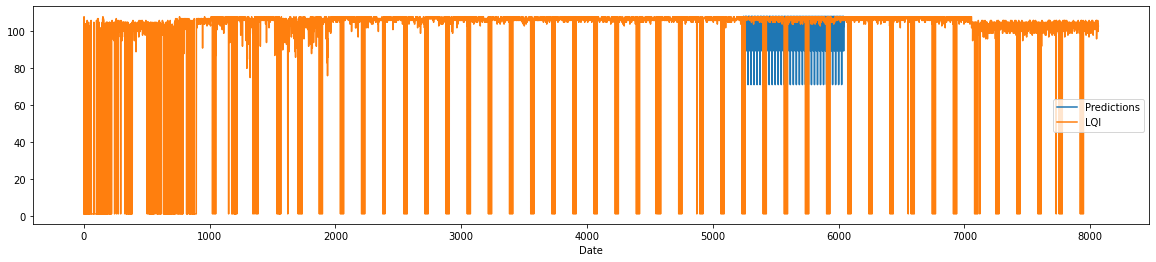

In [235]:
#Segunda predicción
start = SegundoEntrenamiento
end = Test - 1
  

predictions2 = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions2.plot(legend = True, figsize=(20,4)) 
tem['LQI'].plot(legend = True)

In [236]:
#Convertir a dataframe las predicciones
predictions2=predictions2.to_frame()

In [237]:
#renombrar la columna para poder concatenar
predictions2=predictions2.rename(columns={'Predictions':'LQI'})

In [ ]:
#TERCER ENTRENAMIENTO
#SE UNEN train2 y predictions2
train3 = pd.concat([train2,predictions2])
test = tem.iloc[Test-1:cantidad-1]
  
# Fit a SARIMAX(0, 0, 2)x(1, 1, 2, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train3['LQI'],  
                order = (0, 0, 2),  
                seasonal_order =(1, 1, 2, 12)) 
  
result = model.fit() 
result.summary() 

C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [ ]:
#Tercera predicción
start = Test
end = cantidad - 1
  

predictions3 = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions3.plot(legend = True, figsize=(20,4)) 
tem['LQI'].plot(legend = True)

In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
    
# Calculate mean squared error 
mse = mean_squared_error(test["LQI"], predictions3)
print("MSE: ")
print(mse)

# Calculate root mean squared error 
rmse = rmse(test["LQI"], predictions3)
print("\nRMSE: ")
print(rmse)

# Calculate MAPE
def mapes(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape =  mapes(test["LQI"], predictions3)
print("\nMAPE (Porcentaje): ")
print(mape)

In [ ]:
##############################################################################################
#SI QUIERO PREDECIR
# Train the model on the full dataset 
model = model = SARIMAX(tem['LQI'],  
                        order = (0, 0, 2),  
                        seasonal_order =(1, 1, 2, 12)) 

  
# Forecast for the next 3 years 
forecast = result.predict(start = end,  
                          end = end+1000,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
tem['LQI'].plot(figsize = (20, 5), legend = True) 
forecast.plot(legend = True) 